In [45]:
import mido
mid = mido.MidiFile('IMSLP221460-WIMA.2591-BWV_1079_1-Part.mid', clip=True)
#mid.tracks
print(mid.tracks)

[MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=0, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)]), MidiTrack([
  MetaMessage('track_name', name='Violine', time=0),
  MetaMessage('device_name', name='MIDI: Out To MIDI Yoke:  1', time=0),
  Message('program_change', channel=0, program=40, time=0),
  Message('aftertouch', channel=0, value=97, time=0),
  Message('control_change', channel=0, control=7, value=97, time=0),
  Message('pitchwheel', channel=0, pitch=0, time=0),
  Message('control_change', channel=0, control=11, value=63, time=0),
  Message('note_on', channel=0, note=72, velocity=127, time=0),
  Message('note_off', channel=0, note=72, velocity=64, time=730),
  Message('note_on', channel=0, note=75, velocity=127, time=38),
  Message('note_off', channel=0, note=75, velocity=64, time=730),
  Message('note_on', channel=0, note=79, velocity=127, time=38),
  Mess

In [46]:
import numpy as np
notes = np.zeros(shape=(372,1))
print(notes)
bpm = 0
print(type(mid.tracks[0][0]))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [47]:
tempi = []
for track in mid.tracks:
    for msg in track:
        if msg.type == 'set_tempo':
            tempi.append(msg.tempo)
print(tempi)

[500000]


In [48]:
tempo = tempi[0]
ticks_per_beat = mid.ticks_per_beat
bpm = 60000000/tempo
dt = 60 / (bpm * ticks_per_beat)
print(dt)
print(ticks_per_beat)

0.0013020833333333333
384


[[  0.        ]
 [ 72.        ]
 [  2.        ]
 [ 75.        ]
 [  4.        ]
 [ 79.        ]
 [  6.        ]
 [ 80.        ]
 [  8.        ]
 [ 71.        ]
 [ 11.        ]
 [ 79.        ]
 [ 12.        ]
 [ 78.        ]
 [ 14.        ]
 [ 77.        ]
 [ 16.        ]
 [ 76.        ]
 [ 18.        ]
 [ 75.        ]
 [ 21.        ]
 [ 74.        ]
 [ 22.        ]
 [ 73.        ]
 [ 23.        ]
 [ 72.        ]
 [ 24.        ]
 [ 71.        ]
 [ 25.        ]
 [ 69.        ]
 [ 25.5       ]
 [ 67.        ]
 [ 26.        ]
 [ 72.        ]
 [ 27.        ]
 [ 77.        ]
 [ 28.        ]
 [ 75.        ]
 [ 30.        ]
 [ 74.        ]
 [ 30.25      ]
 [ 75.        ]
 [ 30.375     ]
 [ 74.        ]
 [ 30.5       ]
 [ 75.        ]
 [ 30.625     ]
 [ 74.        ]
 [ 30.75      ]
 [ 75.        ]
 [ 30.875     ]
 [ 74.        ]
 [ 31.        ]
 [ 75.        ]
 [ 31.125     ]
 [ 74.        ]
 [ 31.25      ]
 [ 75.        ]
 [ 31.375     ]
 [ 74.        ]
 [ 31.5       ]
 [ 75.        ]
 [ 31.62

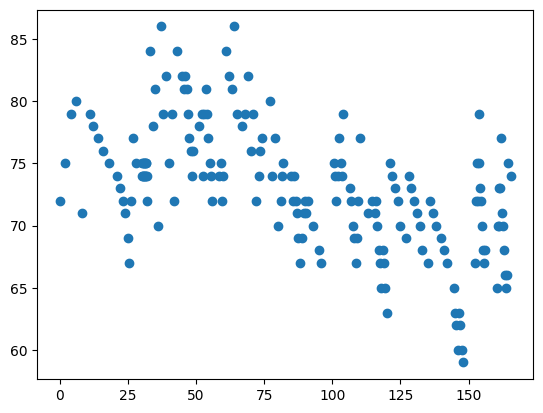

In [49]:
note = 0
beats = []
tones = []
for track in mid.tracks:
    beat = 0
    for msg in track:
        beat += msg.time / ticks_per_beat
        if((msg.type == 'note_on') and (note<371)):
            notes[note][0] = beat
            beats.append(beat)
            notes[note+1][0] = msg.note
            tones.append(msg.note)
            
            note += 2
print(notes)
import matplotlib.pyplot as plt
plt.scatter(beats, tones)
plt.show()

107


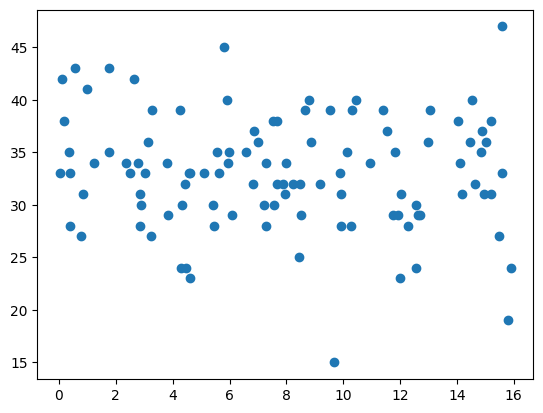

In [50]:
# ::::::::::::::: Random MIDI-Generator::::::::::::::
import random

tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
rseq = np.zeros(shape=(256,1))
duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
# maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten

rmoments = []
rtones = []
for rnote in range(0, n_notes):
    rmoments.append(random.uniform(0, duration))
    rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
rmoments.sort()

print(len(rtones))
plt.scatter(rmoments, rtones)
plt.show()

In [51]:
rmid = mido.MidiFile()
track = mido.MidiTrack()
rmid.tracks.append(track)
tpb = 1680
rmid.ticks_per_beat = tpb

rest = 0
rnote = 0
for rnote in range(0, n_notes-1):
    if((rmoments[rnote+1]-rmoments[rnote])*tpb <= 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=int(round((rmoments[rnote+1]-rmoments[rnote])*tpb))))
        rest = 0

    elif((rmoments[rnote+1]-rmoments[rnote])*tpb > 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=840))
        rest = int(round((rmoments[rnote+1]-rmoments[rnote])*tpb-840))
        
track.append(mido.Message('note_on', channel=0, note=rtones[n_notes-1], velocity=127, time=rest))
track.append(mido.Message('note_off', channel=0, note=rtones[n_notes-1], velocity=96, time=840))    

track.append(mido.MetaMessage('end_of_track'))

rmid.save('random.mid')

In [52]:
def mid2vec(mid):
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    # Maak vector met de noten
    notes = np.zeros(shape=(372,1))
    note = 0
    beats = []
    tones = []
    for track in mid.tracks:
        beat = 0
        for msg in track:
            beat += msg.time / ticks_per_beat
            if((msg.type == 'note_on') and (note<371)):
                notes[note][0] = beat
                beats.append(beat)
                notes[note+1][0] = msg.note
                tones.append(msg.note)
                note += 2

    return(notes)
print(mid2vec(mid))

[[  0.        ]
 [ 72.        ]
 [  2.        ]
 [ 75.        ]
 [  4.        ]
 [ 79.        ]
 [  6.        ]
 [ 80.        ]
 [  8.        ]
 [ 71.        ]
 [ 11.        ]
 [ 79.        ]
 [ 12.        ]
 [ 78.        ]
 [ 14.        ]
 [ 77.        ]
 [ 16.        ]
 [ 76.        ]
 [ 18.        ]
 [ 75.        ]
 [ 21.        ]
 [ 74.        ]
 [ 22.        ]
 [ 73.        ]
 [ 23.        ]
 [ 72.        ]
 [ 24.        ]
 [ 71.        ]
 [ 25.        ]
 [ 69.        ]
 [ 25.5       ]
 [ 67.        ]
 [ 26.        ]
 [ 72.        ]
 [ 27.        ]
 [ 77.        ]
 [ 28.        ]
 [ 75.        ]
 [ 30.        ]
 [ 74.        ]
 [ 30.25      ]
 [ 75.        ]
 [ 30.375     ]
 [ 74.        ]
 [ 30.5       ]
 [ 75.        ]
 [ 30.625     ]
 [ 74.        ]
 [ 30.75      ]
 [ 75.        ]
 [ 30.875     ]
 [ 74.        ]
 [ 31.        ]
 [ 75.        ]
 [ 31.125     ]
 [ 74.        ]
 [ 31.25      ]
 [ 75.        ]
 [ 31.375     ]
 [ 74.        ]
 [ 31.5       ]
 [ 75.        ]
 [ 31.62

In [53]:
def randombass():
    tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
    rseq = np.zeros(shape=(256,1))
    duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
    n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
    # maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten
    
    rmoments = []
    rtones = []
    for rnote in range(0, n_notes):
        rmoments.append(random.uniform(0, duration))
        rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
    rmoments.sort()

    rnote = 0
    rnotes = np.zeros(shape=(372,1))
    halfpos = 0
    while(rnote < 371 and halfpos < n_notes):
        rnotes[rnote] = rmoments[halfpos]
        rnotes[rnote+1] = rtones[halfpos]
        halfpos += 1
        rnote += 2
    return(rnotes)

In [54]:
# Import dataset
import os
directory = 'BASSmidis'

filepaths = []
for filename in os.scandir(directory):
    if filename.is_file():
        filepaths.append(filename.path)
print(filepaths)

['BASSmidis\\005 - deadmau5 bass.mid', 'BASSmidis\\006 - hardwell bass.mid', 'BASSmidis\\01 c minor bass.mid', 'BASSmidis\\01 c sharp bass.mid', 'BASSmidis\\01 dms ttl1 bass.mid', 'BASSmidis\\016 - paul van dyk bass.mid', 'BASSmidis\\017 - nicky romero bass.mid', 'BASSmidis\\019 bass.mid', 'BASSmidis\\01a sub bass.mid', 'BASSmidis\\02 c major bass.mid', 'BASSmidis\\02 dms ttl1 bass.mid', 'BASSmidis\\02 f bass.mid', 'BASSmidis\\02 g bass.mid', 'BASSmidis\\024 - dada life bass.mid', 'BASSmidis\\026 - fedde le grand bass.mid', 'BASSmidis\\029 - laidback luke bass.mid', 'BASSmidis\\02b flux bass.mid', 'BASSmidis\\02b nuke em bass.mid', 'BASSmidis\\02c flux bass.mid', 'BASSmidis\\02c nuke em bass.mid', 'BASSmidis\\03 d minor bass.mid', 'BASSmidis\\03 dms ttl1 bass.mid', 'BASSmidis\\034 bass.mid', 'BASSmidis\\035 - chuckie bass.mid', 'BASSmidis\\036 - zatox bass.mid', 'BASSmidis\\037 bass.mid', 'BASSmidis\\039 - cosmic gate bass.mid', 'BASSmidis\\03b neuro funk bass.mid', 'BASSmidis\\03b sub

In [55]:
dataset = []
for path in filepaths:
    mid = mido.MidiFile(path, clip=True)
    dataset.append(mid2vec(mid))

In [56]:
def adderror(notes):
    noteserr = np.copy(notes)
    n_notes = int(round(np.count_nonzero(noteserr)/2))
    dice = random.randint(1, 10)
    if(dice < 7):
        errpos = random.randint(0, n_notes - 1) * 2
        noteserr[errpos] += np.random.normal(loc=0, scale=1)
    else:
        errpos = random.randint(1, n_notes) * 2 - 1
        noteserr[errpos] += round(np.random.normal(loc=0, scale=6))
    return(noteserr)

In [57]:
# Genereer basslines met error

error1 = []
error1_2 = []
error1_3 = []
error1_4 = []
piece = 0
numpieces = len(dataset)
while(piece < numpieces):
    #print(filepaths[piece])
    error1.append(adderror(dataset[piece]))
    error1_2.append(adderror(dataset[piece]))
    error1_3.append(adderror(dataset[piece]))
    error1_4.append(adderror(dataset[piece]))
    piece += 1
piece = 0

In [58]:
def normalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 1/24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = (notes[note+1])/60 # Middle C = 1
        note += 2
    return(notes)

In [59]:
piece = 0
normalizeddata = np.copy(dataset)
normalizederror1 = np.copy(error1)
normalizederror1_2 = np.copy(error1_2)
normalizederror1_3 = np.copy(error1_3)
normalizederror1_4 = np.copy(error1_4)
while(piece < numpieces):
    normalizeddata[piece] = normalize(normalizeddata[piece])
    normalizederror1[piece] = normalize(normalizederror1[piece])
    normalizederror1_2[piece] = normalize(normalizederror1_2[piece])
    normalizederror1_3[piece] = normalize(normalizederror1_3[piece])
    normalizederror1_4[piece] = normalize(normalizederror1_4[piece])
    piece += 1

In [60]:
y = np.concatenate((normalizeddata, normalizeddata, normalizeddata, normalizeddata))
X = np.concatenate((normalizederror1, normalizederror1_2, normalizederror1_3, normalizederror1_4))

=== NEURAAL NET 1, TRAINEN OP 1 FOUT ===

In [85]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(372, activation='relu', input_shape=(372,)))
model.add(layers.Dense(372, activation='relu'))
model.add(layers.Dense(372, activation='relu'))
model.add(layers.Dense(372, activation='relu'))
model.add(layers.Dense(372, activation='relu'))
model.add(layers.Dense(372, activation='relu'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 372)               138756    
                                                                 
 dense_79 (Dense)            (None, 372)               138756    
                                                                 
 dense_80 (Dense)            (None, 372)               138756    
                                                                 
 dense_81 (Dense)            (None, 372)               138756    
                                                                 
 dense_82 (Dense)            (None, 372)               138756    
                                                                 
 dense_83 (Dense)            (None, 372)               138756    
                                                                 
Total params: 832536 (3.18 MB)
Trainable params: 8325

In [86]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=opt, metrics='accuracy')
model.fit(X, y, batch_size=32, epochs=1, validation_split=0.1)
model.evaluate()

ValueError: in user code:

    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\metrics\accuracy_metrics.py", line 459, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "C:\Users\daanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\metrics_utils.py", line 960, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 372 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](remove_squeezable_dimensions/Squeeze)' with input shapes: [?,372].


In [74]:
print(type(X[0][0][0]))

<class 'numpy.float64'>


In [88]:
print(np.rot90(X[0]))

[[0.         0.75       0.02083333 0.75       0.04166667 0.75
  0.0625     0.75       0.08333333 0.75       0.10416667 0.75
  0.14583333 0.75       0.16666667 0.75       0.1875     0.75
  0.20833333 0.75       0.22916667 0.75       0.25       0.75
  0.27083333 0.75       0.29166667 0.75       0.33333333 0.75
  0.35416667 0.75       0.39640296 0.75       0.39583333 0.75
  0.41666667 0.75       0.4375     0.75       0.47916667 0.75
  0.5        0.75       0.52083333 0.75       0.54166667 0.75
  0.5625     0.75       0.58333333 0.75       0.60416667 0.75
  0.625      0.75       0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.       